<div dir="rtl" style="font-size:18px;">

<center><div dir="rtl" style="font-size:40px;"> بخش 4</div></center>
<div dir="rtl" style="font-size:18px;">
مدل‌های رگرسیون با جنگل تصادفی(Random Forest)
</div>


<div dir="rtl" style="font-size:18px;">
در بخش ۴، ما یک مدل رگرسیون از مهارکننده‌های کرونا با استفاده از الگوریتم جنگل تصادفی خواهیم ساخت.
</div>


</div>

<div dir="rtl" style="font-size:18px;">
۱. وارد کردن کتابخانه‌ها
</div>


In [1]:

! pip install numpy
! pip install seaborn



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

<div dir="rtl" style="font-size:18px;">
۲. بارگذاری مجموعه داده
</div>


In [3]:
df = pd.read_csv('./csv/bioactivity_data_3class_pIC50_pubchem_fp.csv')

<div dir="rtl" style="font-size:18px;">
۳. ویژگی‌های ورودی
داده‌های استیل‌کولین‌استراز شامل ۸۸۱ ویژگی ورودی و ۱ متغیر خروجی (مقادیر pIC50) می‌باشند.
</div>


<div dir="rtl" style="font-size:18px;">
۳.۱. ویژگی‌های ورودی
</div>


In [4]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
83,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
84,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<div dir="rtl" style="font-size:18px;">
۳.۲. ویژگی‌های خروجی
</div>


In [5]:
Y = df.pIC50
Y

0     5.142668
1     5.026872
2     4.869666
3     4.882397
4     5.698970
        ...   
81    4.675718
82    3.644548
83    4.412289
84    4.841638
85    4.675718
Name: pIC50, Length: 86, dtype: float64

<div dir="rtl" style="font-size:18px;">
۳.۳. بیایید ابعاد داده را بررسی کنیم
</div>


In [6]:
X.shape

(86, 881)

In [7]:
Y.shape

(86,)

<div dir="rtl" style="font-size:18px;">
۳.۴. حذف ویژگی‌های با واریانس پایین
</div>


In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X) 

In [9]:
X.shape

(86, 185)

<div dir="rtl" style="font-size:18px;">
۴. تقسیم داده‌ها (نسبت ۸۰/۲۰)
</div>


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
X_train.shape, Y_train.shape

((68, 185), (68,))

In [12]:
X_test.shape, Y_test.shape

((18, 185), (18,))

<div dir="rtl" style="font-size:18px;">
۵. ساخت مدل رگرسیون با استفاده از جنگل تصادفی
</div>


In [13]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.519408213846229

In [14]:
Y_pred = model.predict(X_test)

<div dir="rtl" style="font-size:18px;">
۶. نمودار پراکندگی مقادیر آزمایشی در مقابل مقادیر پیش‌بینی‌شده pIC50
</div>


<function matplotlib.pyplot.show(close=None, block=None)>

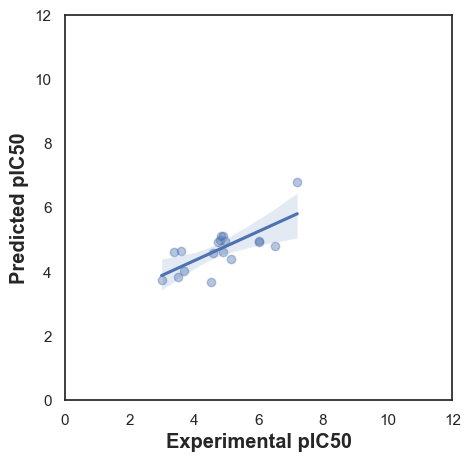

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show